<font color= "lime"> <h1> <b> Why XAI ?

<img src ="https://www.intechopen.com/media/chapter/72398/media/F3.png">


<font color= "lime"> <h1> <b> How XAI works

<font color= "lime">Explainable AI (XAI) refers to techniques and methodologies that aim to provide transparency and understanding of how AI models make predictions or decisions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Datasets/california_housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# df['median_house_value'].sum()/20640

In [ ]:
# View summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [ ]:
# Declare feature vector and target variable
X = df[['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']]
y = df['median_house_value']

In [ ]:
# Split the data into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

68126.3666645792

<font color= "lime"> <h1> <b> SHAP

In [ ]:
! pip install shap

In [ ]:
# import shap library
import shap                                                       # SHAP values >> contributions of each feature to a model's prediction for a single instance of data

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)                                      # numpy array containing the SHAP values calculated for the entire training dataset


# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])
# expected_value = represents the base value which is the average model output over the training dataset
# shap_values[0,:]=  extracts the SHAP values for the first row of the data
# X_train.iloc[0,:]= first row of the DataFrame

<Figure size 1000x400 with 0 Axes>

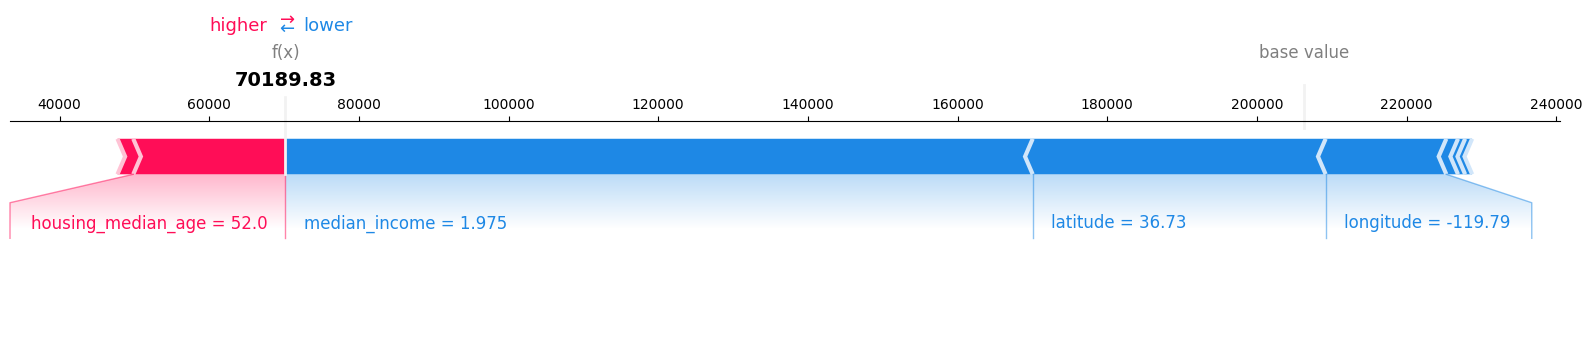

In [ ]:
# using matplotlib to make a white background for clear visualization----
import matplotlib.pyplot as plt

# Visualize the first prediction's explanation with a white background
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True, show=False)
plt.gca().set_facecolor('white')  # Set background color to white
plt.show()

<font color= "yellow"> (1) Feature Contribution:  identify which features have a positive or negative impact on the prediction. </br> (2) Base Value: The base value represents the average model output over the training dataset </br>  (3) Output value: output value is the actual prediction made by the model for a specific instance of the data

<font color= "yellow">The above plot shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red and those pushing the prediction lower are in blue.

<font color= "yellow">So, housing_median_age pushes the prediction higher and median_income,latitude and longitude pushes the prediction lower.

<font color= "yellow">The output value is 70189.83 with housing_median_age=52, median_income=1.975, latitude=36.73 and longitude=-119.8.

<font color= "yellow">The following plot is interactive. Just scroll the mouse and see the different values.

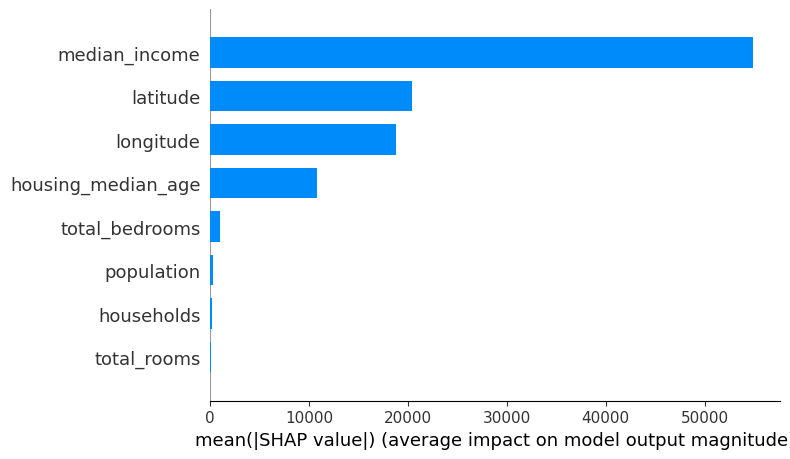

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

<font color= "yellow">The above plot shows the SHAP feature importance measured as the mean absolute Shapley values.

<font color= "yellow">The variable median_income was the most important feature, changing the predicted median_house_value on average by 50000+ on x-axis.

<font color= "yellow">SHAP is based on magnitude of feature attributions. The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at the summary plot.

<font color= "aqua"> <b>  Confusion 🤔: Feature effect vs. Feature importance: </br> feature importance provides an overview of the importance of each feature across the entire dataset, while feature effect explains the impact of individual feature values on model predictions for specific instances of data. the force plot primarily represents feature effect

<font color= "lime"> <h1> <b> Summary Plot

<font color="yellow">The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value </font>

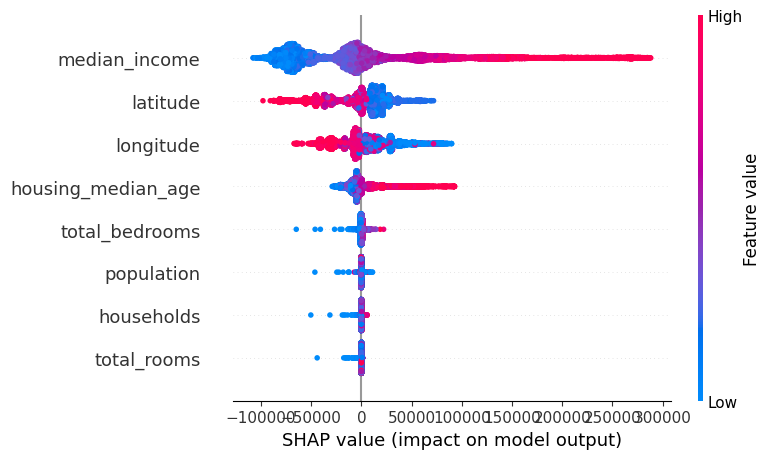

In [ ]:
shap.summary_plot(shap_values, X_train)


<font color= "yellow"> (1) Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. The features are ordered according to their importance.

<font color= "yellow"> (2) This plot is made of all the dots in the train data. It demonstrates the following information:

<font color= "yellow">(2.a) Feature importance: Variables are ranked in descending order. </br>
(2.b) Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction. </br>
(2.c) Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

<font color= "yellow">(2.d) Correlation: A high level of the median_income has a high and positive impact on the median_house_value. The “high” comes from the red color, and the “positive” impact is shown on the X-axis.
Similarly, housing_median_age is positively correlated with the target variable median_house_value </font>